TotRmag Normal Fit -21.391494750976562, 1.056513786315918
TotRmag Gamma fit : 34.07612063236854 -27.479528481494917 0.17862630918533617
TotRmag Johnson fit : -0.5241155807601983 1.659188484469038 -21.91827788537714 1.3657450090828793
TotRmag BoxCox lamda 4.25768875262945
TotRmag Normal fit : 110069.0078125 21927.10546875


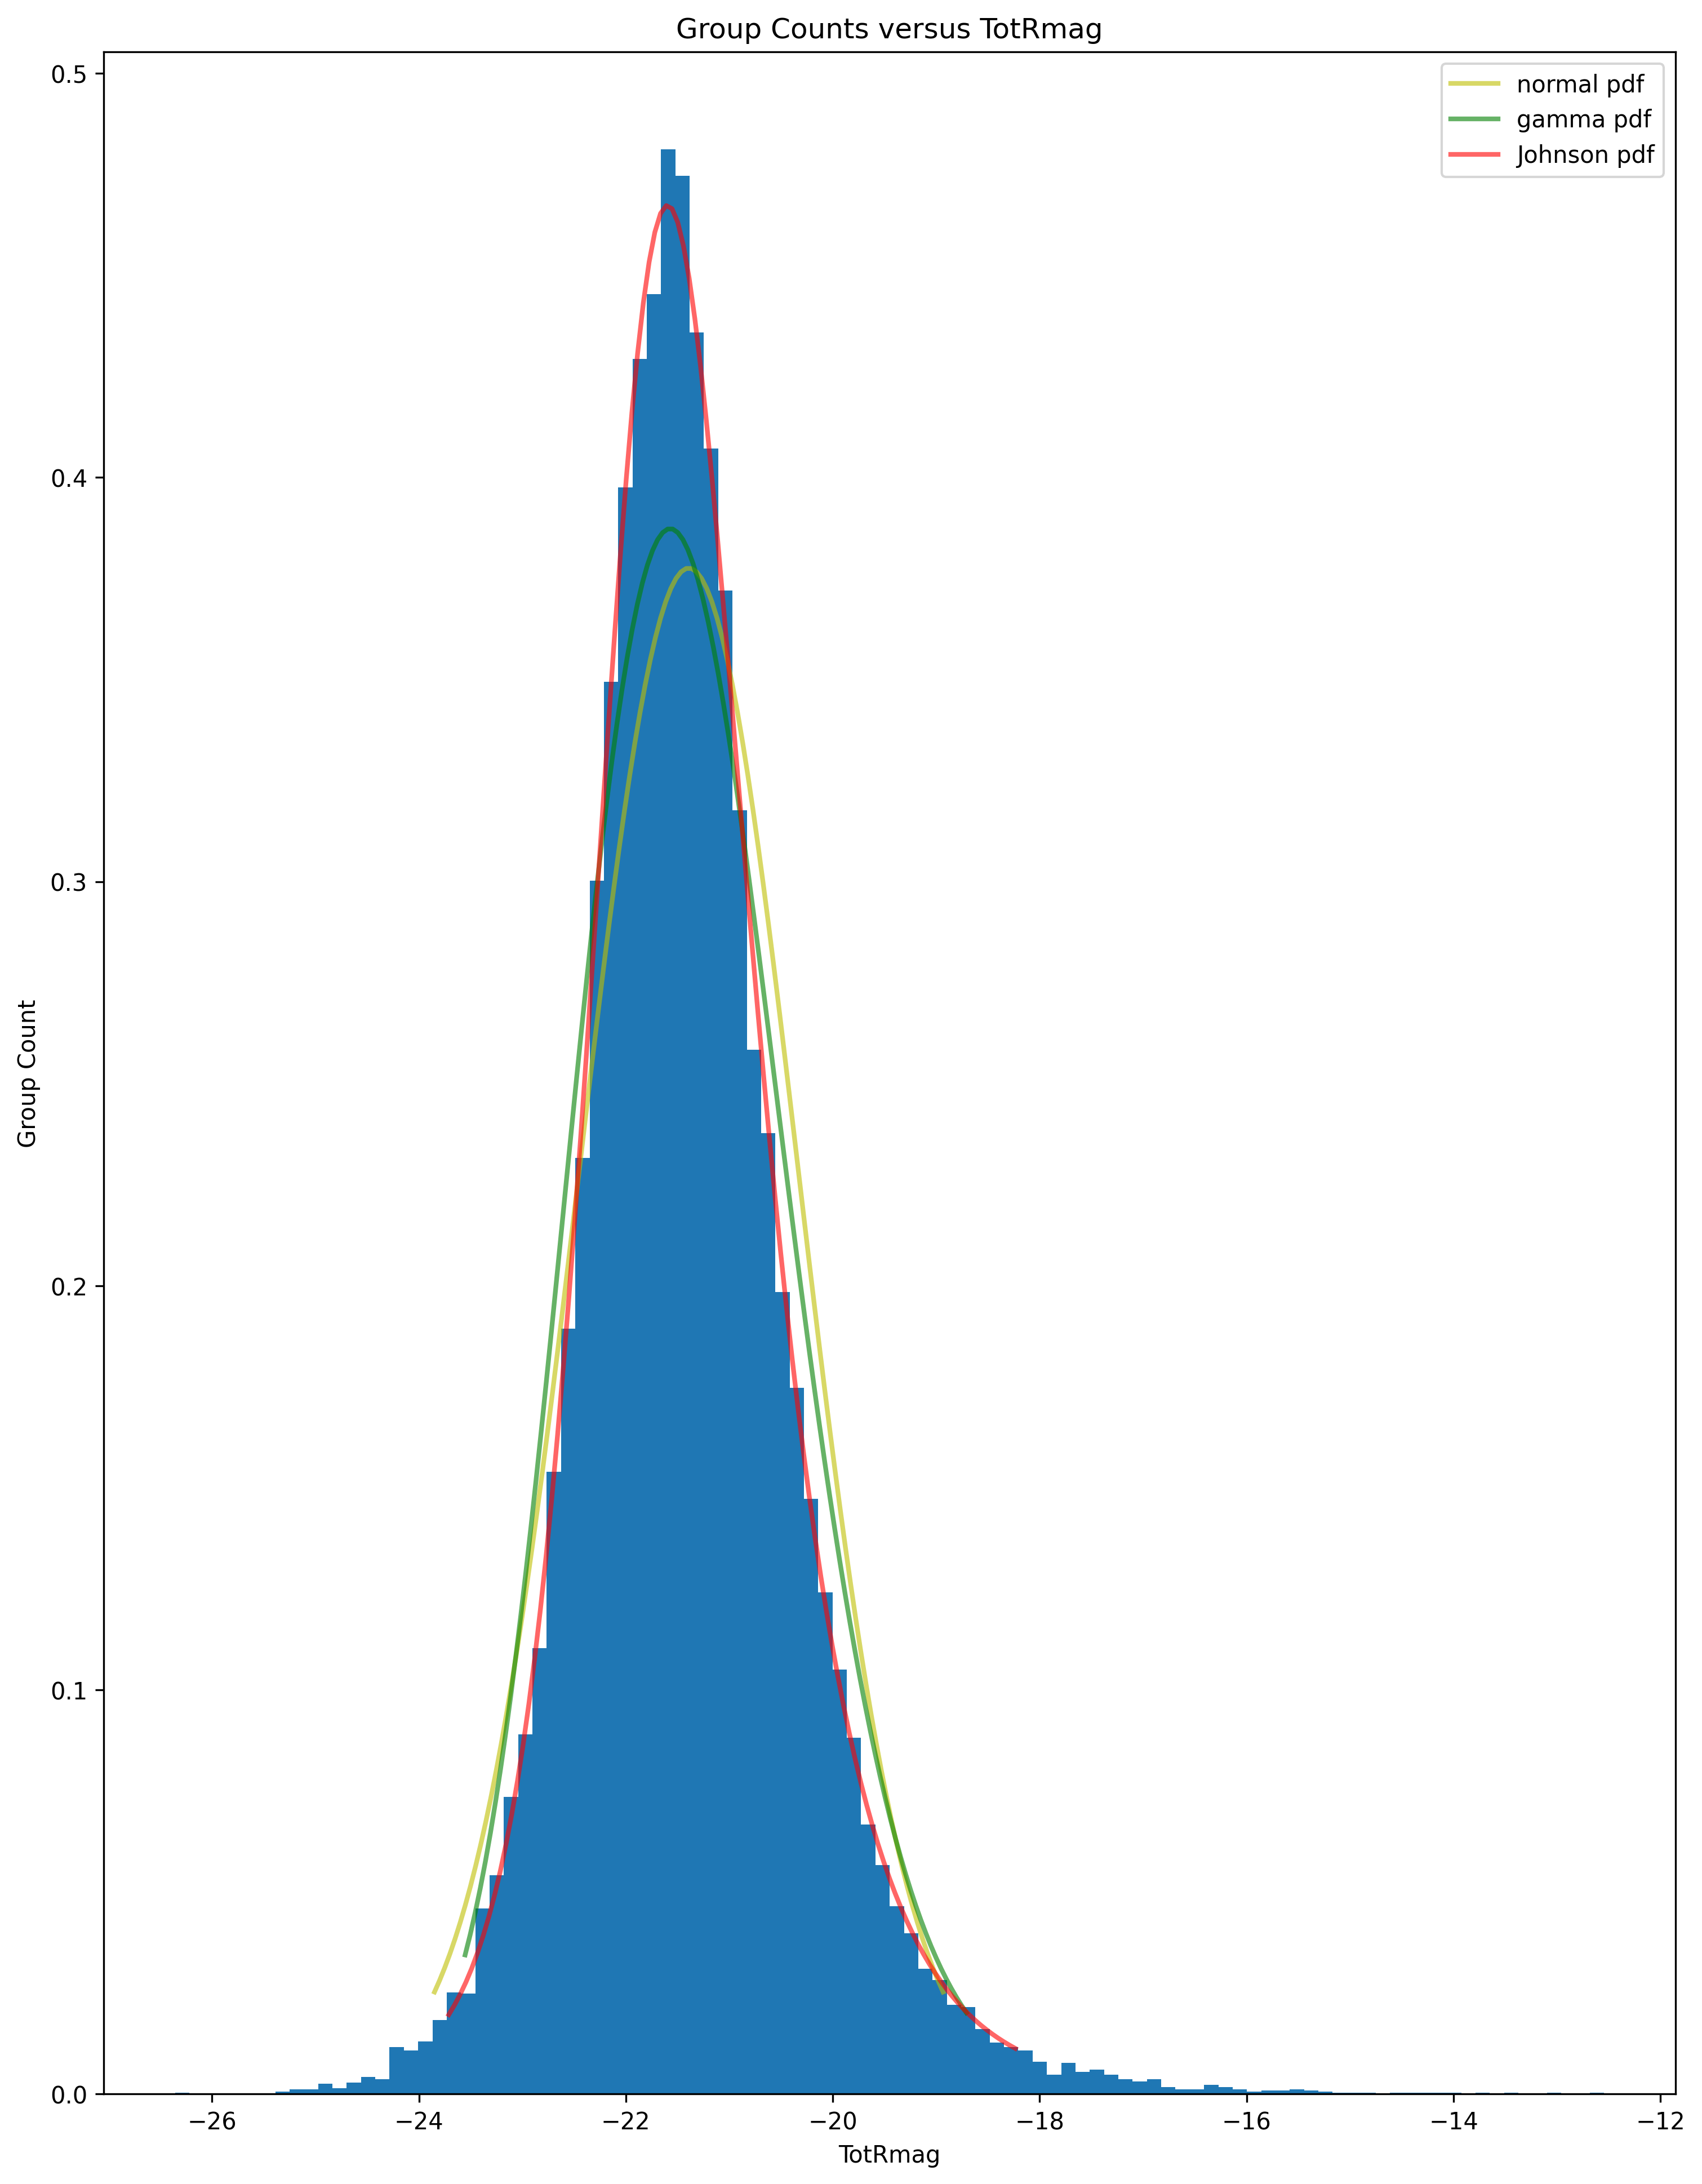

ForGroup : 26194
Before Clean GroupGal : 204110
After Clean GroupGal : 83093
StellarMasses : 114685
EnvMeasures : 67996
visualMorph : 38795
Group Gal size before join : 83093


Group Gal size after Join : 83093
Join GroupGal & StellarMasses 1980


Joining Environment Measures 1244
-24.846533
-18.25309
Pearson Correlation x: CountInCyl y: TotRmag Correlation : -0.6685298833055822 T-Test : 6.231722665508626e-162
Spearman Correlation x: CountInCyl y: TotRmag Correlation : -0.6463191264899282 T-Test : 4.862460312194457e-148
Linear Regresion x: CountInCyl y: TotRmag slope : -0.17622417780108882 Intercept -20.73200793520664 Correlation -0.6685298833055822 Wald test 6.231722665513641e-162 0.0055625388252610935
Pearson Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.4554668163687671 T-Test : 9.785129869177821e-65
Spearman Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.6185264031989779 T-Test : 3.278727607028177e-132
Linear Regresion x: DistanceTo5nn y: TotRmag slope : 0.4528735660893754 Intercept -22.382133266912952 Correlation 0.45546681636876707 Wald test 9.785129869187775e-65 0.02511728897138252
Pearson Correlation x: SurfaceDensity y: TotRmag Correlation : -0.5918757323856606 T-Test : 1.8603655855767653e-118
Spearma

<Figure size 3000x2400 with 0 Axes>

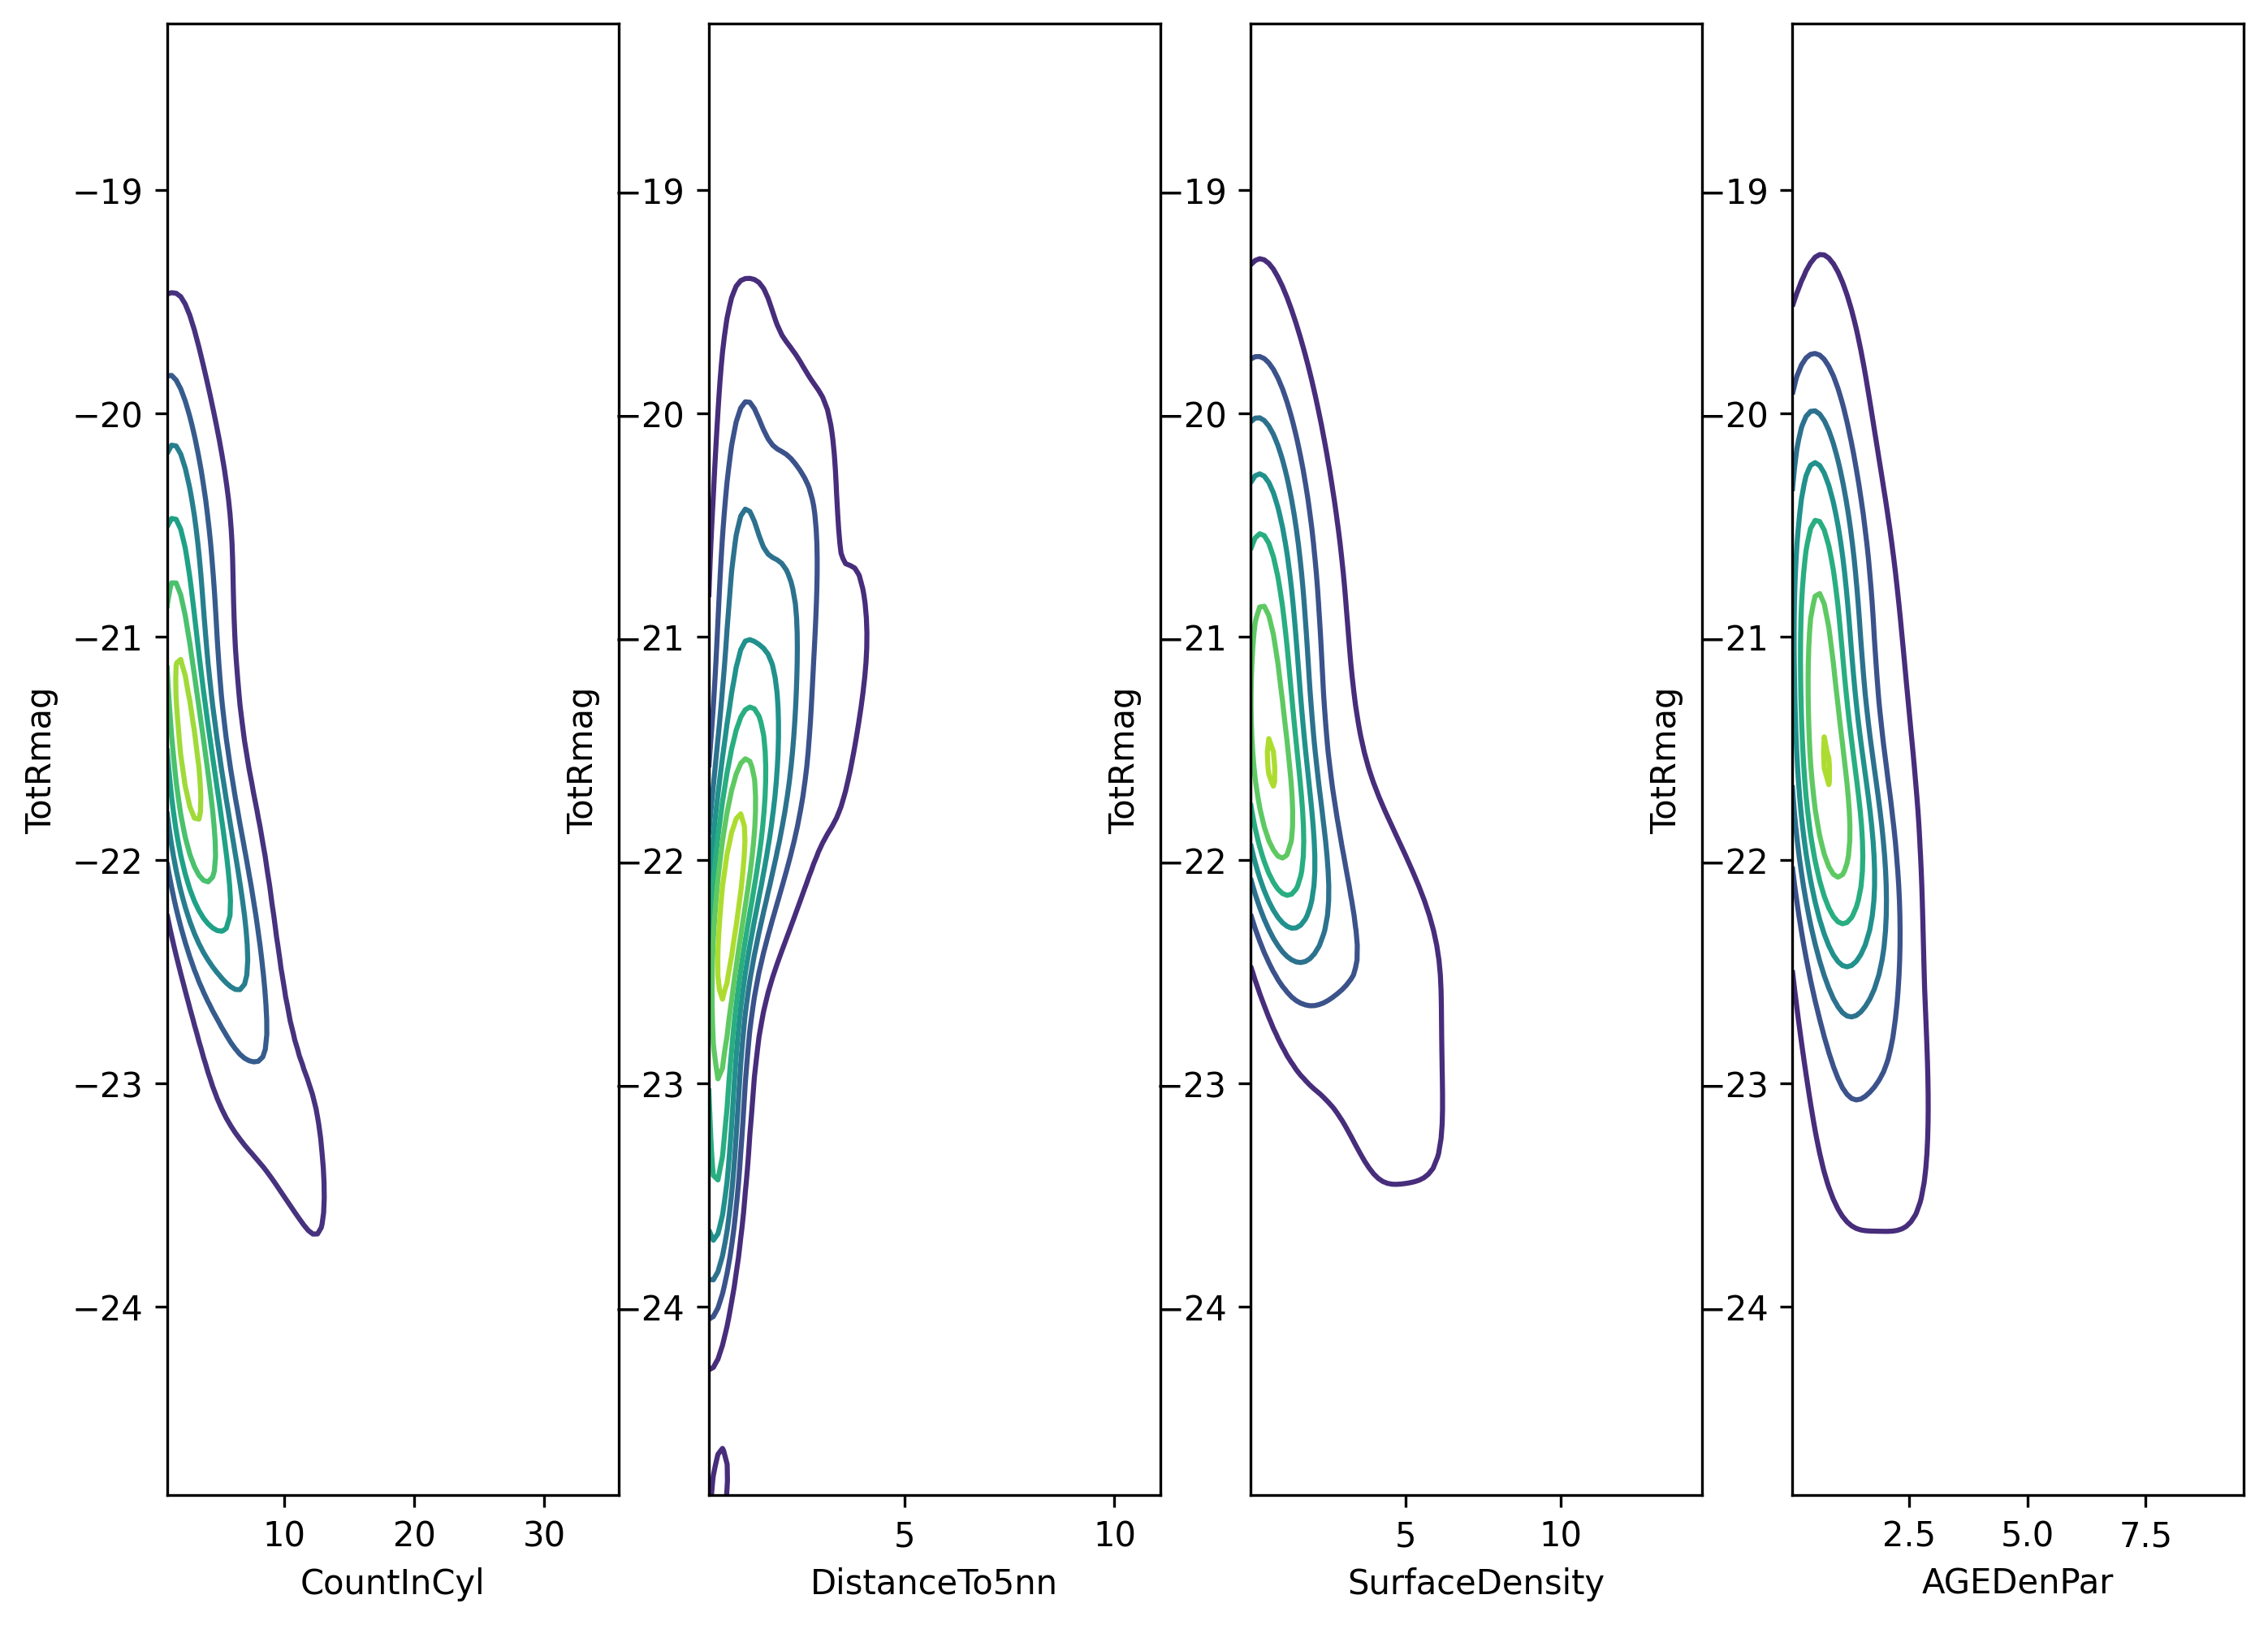

-24.846533
-18.25309
Log - Pearson Correlation x: CountInCyl y: TotRmag Correlation : -0.639216045976403 T-Test : 7.731046588737535e-144
Log - Spearman Correlation x: CountInCyl y: TotRmag Correlation : -0.6463191264899282 T-Test : 4.862460312194457e-148
Log - Linear Regresion x: CountInCyl y: TotRmag slope : -2.1053017902126125 Intercept -20.456371675063718 Correlation -0.6392160459764032 Wald test 7.731046588742955e-144 0.07186999237165995
Log - Pearson Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.576673631369405 T-Test : 3.5991409901477315e-111
Log - Spearman Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.6185264031989779 T-Test : 3.278727607028177e-132
Log - Linear Regresion x: DistanceTo5nn y: TotRmag slope : 2.298310060147396 Intercept -21.87030509465349 Correlation 0.5766736313694046 Wald test 3.599140990152259e-111 0.09239028128877975
Log - Pearson Correlation x: SurfaceDensity y: TotRmag Correlation : -0.5761306011266152 T-Test : 6.448216949323584e-111
Log 

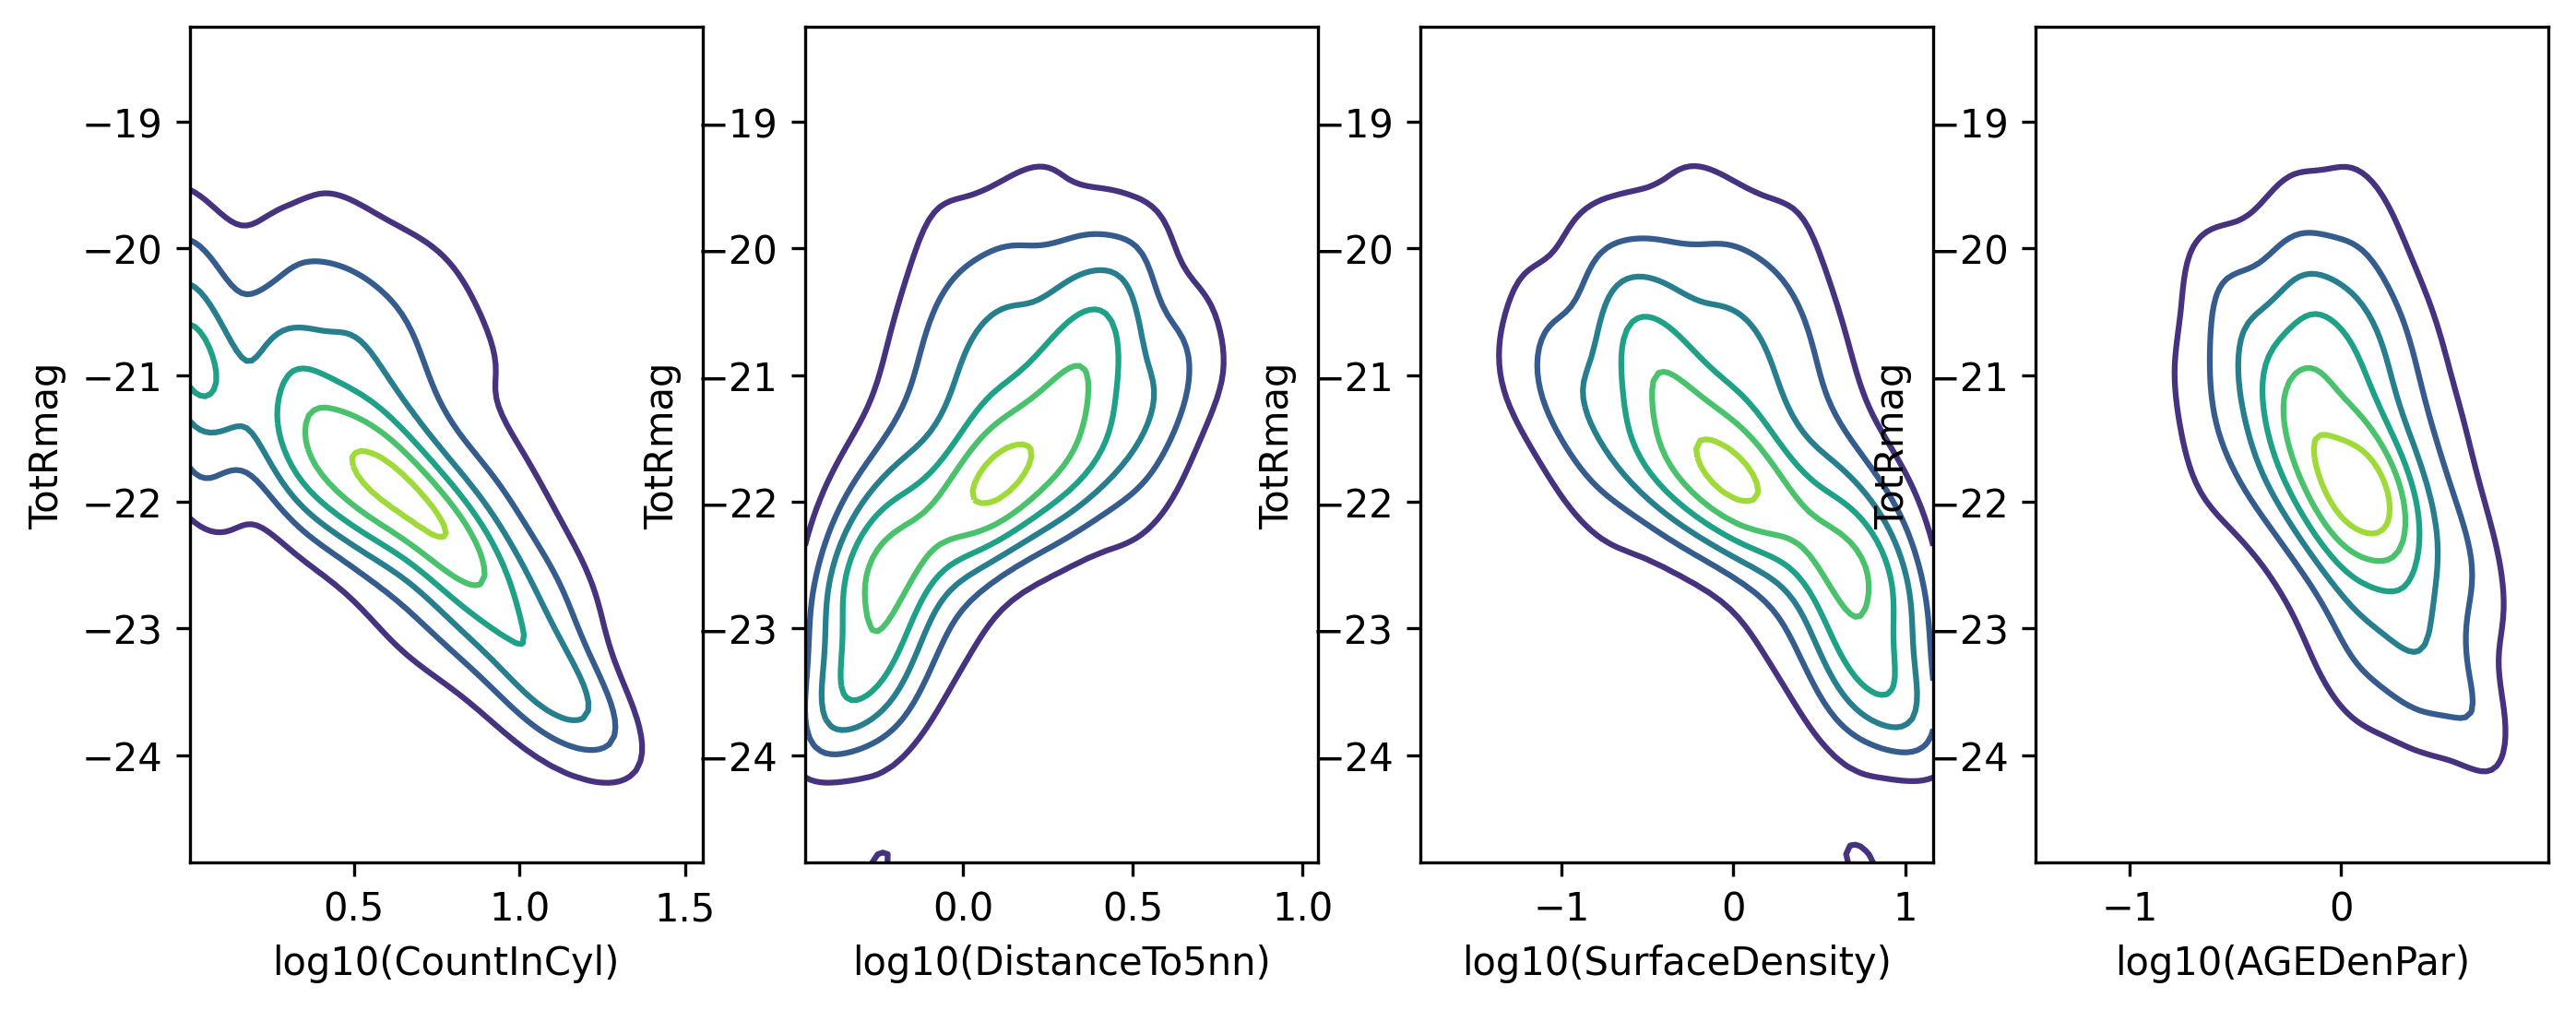

Joining Environment Classes 1213
 Type Voids size 145
 Type Sheet size 320
 Type Filament size 548
 Type Knot size 200


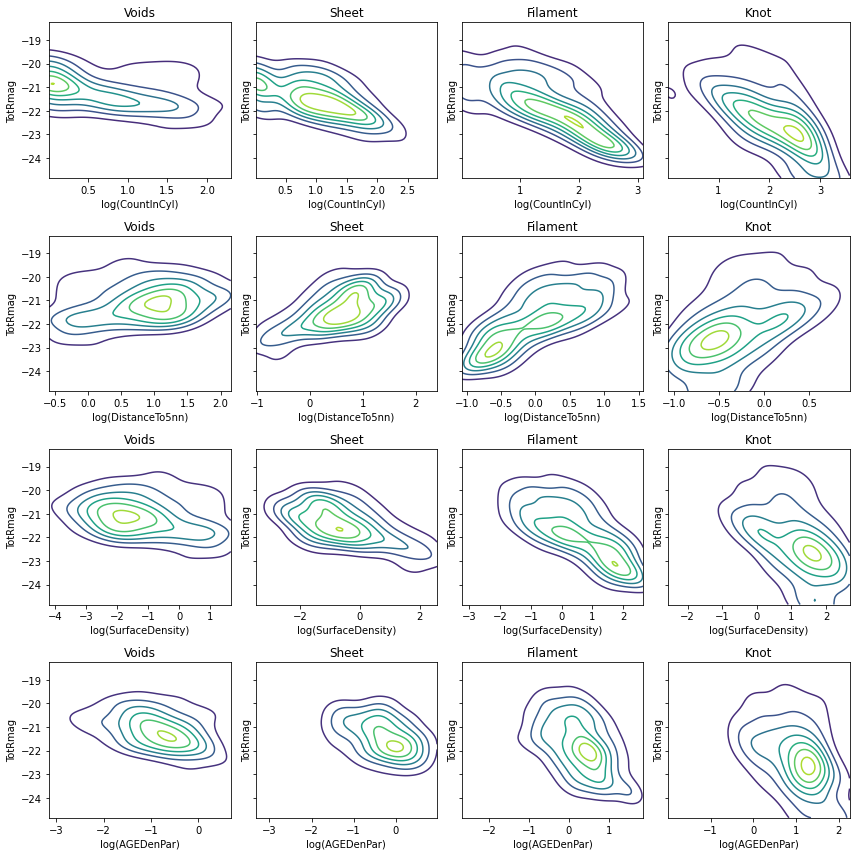

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')

## Clean Data

binCount = 100

fig = plt.figure(figsize=(12, 16), dpi=300)

xfield = 'TotRmag'
ax1 = fig.add_subplot(1, 1, 1)
ax1.title.set_text('Group Counts versus '+xfield)
ax1.set_ylabel('Group Count')
ax1.set_xlabel(xfield)

an, bn =stats.norm.fit(ForGroup[xfield].data)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ag, bg, cg =stats.gamma.fit(ForGroup[xfield].data)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(ForGroup[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(-ForGroup[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
acn ,bcn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {acn} {bcn}")
xcn0, xcn1 = stats.norm.ppf([0.01, 0.99], acn, scale = bcn)
xcn = np.linspace(xcn0,xcn1,100)
# y values for CoxBox
ycn = (lamda / xcn**lamda-1)

ax1.hist(ForGroup[xfield].data, bins=binCount, density=True)
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.legend()
fig.savefig('../../ChartsPlots/GroupTotRmagHistogram.png', dpi=300, bbox_inches='tight')
plt.show()




fig = plt.figure(figsize=(10, 8), dpi=300)


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
print(f"Before Clean GroupGal : {len(GroupGal)}")
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"After Clean GroupGal : {len(GroupGal)}")

StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]


StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
print(f"StellarMasses : {len(StellarMasses)}")


envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 15]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCyl'] > 0]

envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
## Clean Data
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]

print(f"Group Gal size before join : {len(GroupGal)}")
GroupGal = join(GroupGal,ForGroup,keys='GroupID',join_type='inner')
print(f"Group Gal size after Join : {len(GroupGal)}")
      
#DataLocalGroup = join(GroupGal,StellarMasses,keys='CATAID',join_type='inner')
#print(f"Join GroupGal & StellarMasses {len(DataLocalGroup)}")
#print(DataLocalGroup.colnames)

DataLocalGroup = join(GroupGal,visualMorph,keys='CATAID',join_type='inner')
print(f"Join GroupGal & StellarMasses {len(DataLocalGroup)}")
#print(DataLocalGroup.colnames)

RErange = join(DataLocalGroup,envMeasures,keys='CATAID',join_type='inner')
print('Joining Environment Measures '+str(len(RErange)))
#print(FinalData.colnames)


yfield = 'TotRmag'
alphaVal = .3

fig = plt.figure(figsize=(11, 8), dpi=300)
#fig.suptitle('Density Plots - Group Redness (TotRmag) versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']     
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for i,xfield in enumerate(xfields,1) :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    #ax.invert_yaxis()           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)
    #ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.spearmanr(x,y)
    print(f"Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()



fig = plt.figure(figsize=(11, 4), dpi=300)
#fig.suptitle('Density Plots - Group Redness (TotRmag) versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = np.log10(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('log10('+xfield+')')
    #ax.invert_yaxis()
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)
    #ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.pearsonr(x,y)
    print(f"Log - Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.spearmanr(x,y)
    print(f"Log - Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Log - Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
    
plt.show()                            
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityTotRmagLogEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()



RErange = join(RErange,envClass,keys='CATAID',join_type='inner')
print('Joining Environment Classes '+str(len(RErange)))



#fig = plt.figure(figsize=(10, 8), dpi=300)
fig, axes = plt.subplots(4,4,figsize=(12, 12), sharey=True) 
#fig.suptitle('Countour Plots - Group Redness versus Log(Environments) for Galaxy Type')

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 0
j = 0

for j, gt in enumerate(types):
    subrange = RErange[RErange['GeoS4'] == gt[0]]
    print(f" Type {gt[1]} size {len(subrange)}")
    y = subrange[yfield]
    for i, xfield in enumerate(xfields) :
        x = np.log(subrange[xfield]+0.01)
        xmin = min(x)
        xmax = max(x)
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        #ax = fig.add_subplot(1, len(xfields), i)
        axes[i,j].set_title(gt[1])
        axes[i,j].set_ylabel(yfield)
        axes[i,j].set_xlabel('log('+xfield+')')
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
        #axes[i,j].imshow(np.rot90(Z), cmap='PuBu')
        axes[i,j].contour(X, Y, Z)
        #axes[i,j].plot(x, y, 'k.', markersize=2)
        #ax.set_xlim([xmin, xmax])
        #ax.set_ylim([ymin, ymax])                           
        #fig.legend(loc="upper right")
        #plt.axis([0, 3, 0, 0.8])
#fig.gca().invert_yaxis()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityTotRmagLogEnvironmentsGalaxyType.png', dpi=300, bbox_inches='tight')
plt.show()
    
